📘 1. Project Title
Predicting Medical Costs Using Linear Regression

Author: Kgotlello M. Leshike
Aspiring Data Scientist | Industrial Engineer

🏥 2. Introduction

Medical costs are influenced by a combination of demographic and lifestyle factors such as age, BMI, number of children, smoking habits, and gender.
The purpose of this project is to use Linear Regression to predict medical insurance charges and understand which variables have the strongest impact on healthcare costs.

This notebook demonstrates a complete end-to-end data science workflow, including:

- Data loading

- Data cleaning & preprocessing

- Exploratory Data Analysis (EDA)

- Feature encoding

- Model training

- Model evaluation

- Insight interpretation

- Visual communication of results


This project showcases skills in:

- Python (pandas, numpy, sklearn, matplotlib, seaborn)

- Regression modeling

- Data visualization

- Interpreting statistical relationships

- Communicating analytical findings

🎯 3. Project Objectives

1. Build a linear regression model to predict individual medical charges.

2. Identify key factors influencing medical costs (e.g., smoking, age, BMI).

3. Evaluate the model using R² and RMSE on validation and test datasets.

4. Present insights through visualizations and statistical summaries.

📂 4. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="coolwarm")


📥 5. Load Dataset & 📊 Descriptive Statistics

In [4]:
#Load dataset
df = pd.read_csv('insurance.csv')

# Descriptive Statistics
print("\n=== Overall Summary Statistics ===")
print(df.describe(include='all'))


=== Overall Summary Statistics ===
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              N

### 📌 Insight: Summary Stats

This step checks the dataset structure and confirms it’s ready for analysis.

**What it shows:**
- No missing values.
- Age and BMI fall within expected ranges.
- Most people are non-smokers.
- Medical charges have a wide spread, suggesting strong cost drivers.

This gives a quick snapshot of the data before deeper analysis.


📊 6. Grouped Analysis

In [5]:
# Average charges by smoker and gender
print("\n=== Average Charges by Smoker Status ===")
print(df.groupby('smoker')['charges'].mean().round(2))

print("\n=== Average Charges by Gender ===")
print(df.groupby('sex')['charges'].mean().round(2))

print("\n=== Average Charges by Region ===")
print(df.groupby('region')['charges'].mean().round(2))


=== Average Charges by Smoker Status ===
smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

=== Average Charges by Gender ===
sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

=== Average Charges by Region ===
region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64


### 📌 Insight: Average Charges by Key Groups

This step compares how medical charges differ across smokers, gender, and regions.

**What it shows:**
- **Smokers pay dramatically more** than non-smokers, the strongest cost difference so far.
- Males have slightly higher average charges than females.
- The **southeast** region records the highest average charges.

These patterns help identify which groups drive higher medical costs.


🔗 7. Correlation Analysis


=== Correlation Table ===
charges             1.00
smoker_yes          0.79
age                 0.30
bmi                 0.20
region_southeast    0.07
children            0.07
sex_male            0.06
region_northwest   -0.04
region_southwest   -0.04
Name: charges, dtype: float64

=== Top Correlations with charges ===
charges             1.00
smoker_yes          0.79
age                 0.30
bmi                 0.20
region_southeast    0.07
children            0.07
sex_male            0.06
region_northwest   -0.04
region_southwest   -0.04
Name: charges, dtype: float64


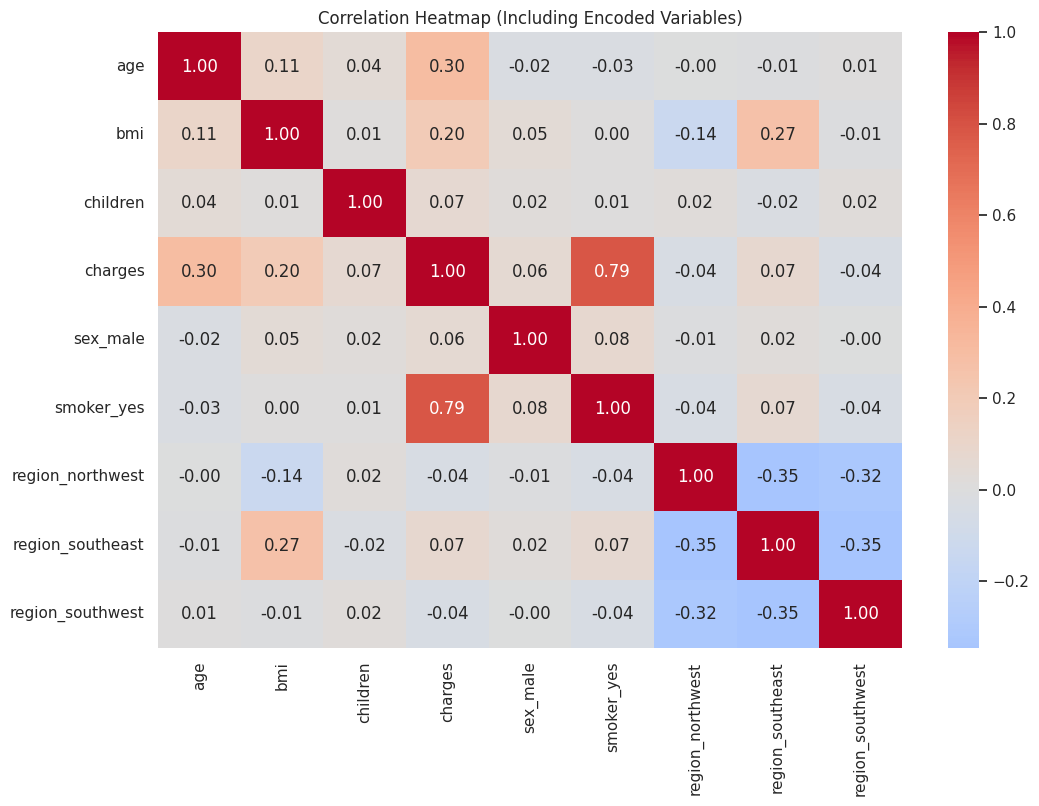

In [6]:
# Correlation Table including encoded categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Encode first for correlation
corr_table = df_encoded.corr()  # smoker, gender, region
print("\n=== Correlation Table ===")
print(corr_table['charges'].sort_values(ascending=False).round(2))  # Show top correlations with charges

# Print top correlations with 'charges'
print("\n=== Top Correlations with charges ===")
print(corr_table['charges'].sort_values(ascending=False).round(2))

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_table, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Including Encoded Variables)")
plt.show()

### 📌 Insight: Correlation Analysis

This step checks which factors are most strongly linked to medical charges.

**What it shows:**
- **Smoking is the strongest driver** of higher charges (+0.79 correlation).
- Age and BMI also increase medical costs, but to a lesser degree.
- Gender and region have only weak relationships with charges.

This helps focus the analysis on the variables that matter most for prediction.


🧹 8. Feature Encoding & Splitting

In [7]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split: 50/25/25
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### 📌 Insight: Data Preparation & Splitting

Here the dataset is encoded and split into training, validation, and testing sets.

**Why this matters:**
- Encoding converts categorical features into a format suitable for machine learning.
- Splitting the data (50/25/25) ensures the model can be trained, tuned, and fairly evaluated on unseen data.

This sets up a clean workflow for building and assessing the model.


🤖 9. Train Linear Regression Model

In [8]:
# Train Linear Regression Model
Mmasibotsana = LinearRegression()
Mmasibotsana.fit(X_train, y_train)

# Predictions
y_val_pred = Mmasibotsana.predict(X_val)
y_test_pred = Mmasibotsana.predict(X_test)

### 📌 Insight: Model Training

A Linear Regression model is trained on the prepared dataset.

**What this does:**
- Fits the model using the training data.
- Generates predictions for the validation and test sets.

This creates the baseline model that will be evaluated in the next steps.


📈 10. Model Evaluation

In [9]:
print("\n=== Model Performance ===")
print("Validation R²:", round(r2_score(y_val, y_val_pred), 4))
print("Validation RMSE:", round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2))
print("Test R²:", round(r2_score(y_test, y_test_pred), 4))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 2))


=== Model Performance ===
Validation R²: 0.7753
Validation RMSE: 6101.88
Test R²: 0.7726
Test RMSE: 5772.84


### 📌 Insight: Model Performance

The linear regression model performs consistently on both validation and test data.

**Key results:**
- **R² ≈ 0.77** → The model explains about 77% of the variation in medical charges.
- **RMSE ~ 5.7k–6.1k** → Average prediction error is around $6,000.

**What this means:**
The model is stable and captures the main cost drivers well, but the high error indicates that real-world medical charges are highly variable and influenced by factors not captured in the dataset.


📊 11. Visualizations

🔹 Gender Distribution

🔹 Gender | Smoker | Age | Charges Distribution

/tmp/ipython-input-455593015.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.values, y=gender_counts.index, palette="viridis", orient='h')


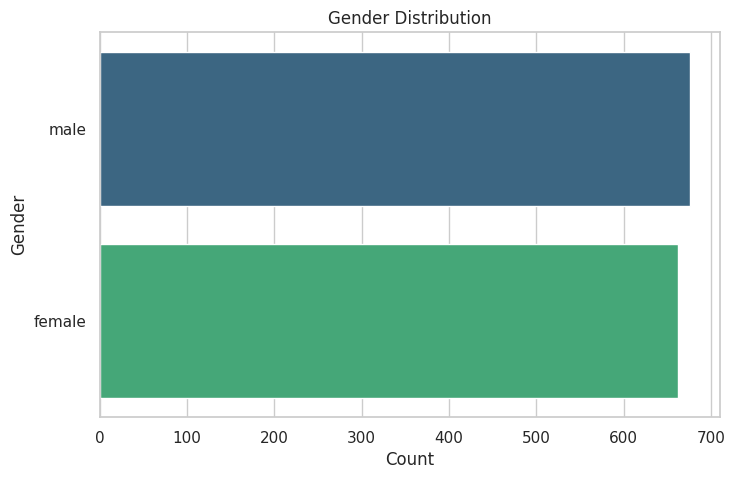

/tmp/ipython-input-455593015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoker_counts.values, y=smoker_counts.index, palette="magma", orient='h')


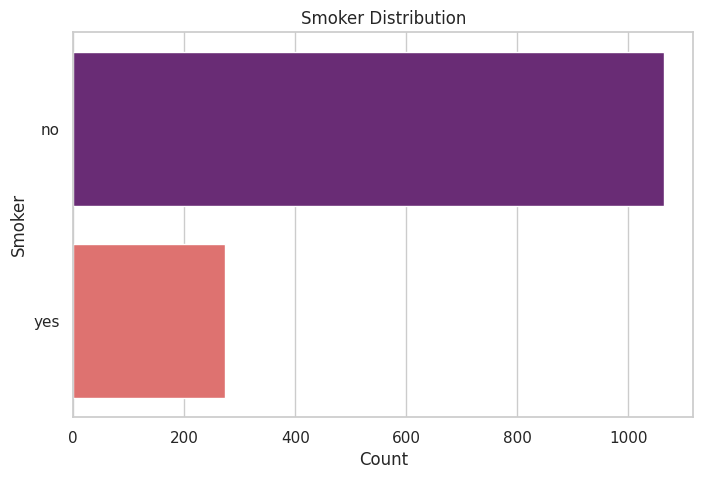

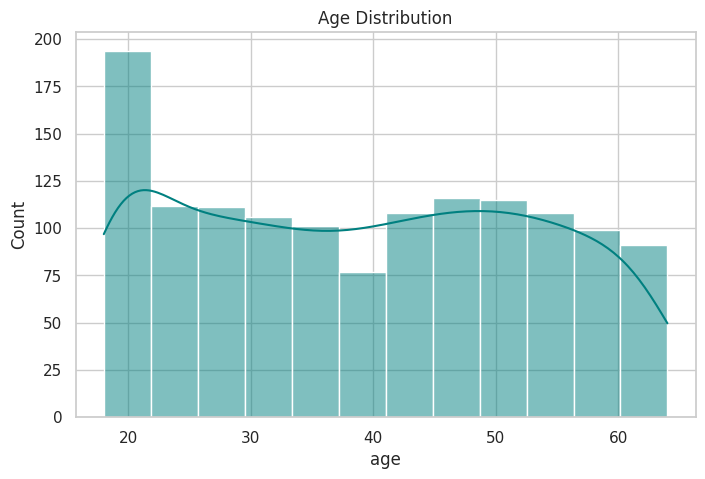

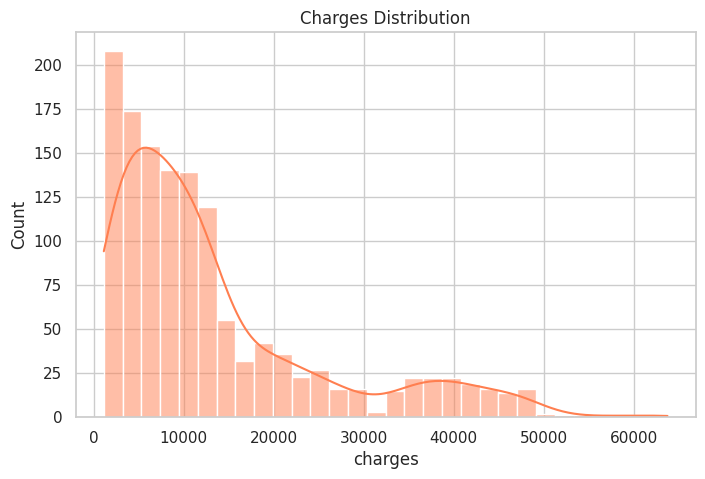

In [10]:
#Gender Distribution
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.values, y=gender_counts.index, palette="viridis", orient='h')
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

# Smoker Distribution
smoker_counts = df['smoker'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=smoker_counts.values, y=smoker_counts.index, palette="magma", orient='h')
plt.title('Smoker Distribution')
plt.xlabel('Count')
plt.ylabel('Smoker')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, color='teal')
plt.title('Age Distribution')
plt.show()

# Charges Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['charges'], kde=True, color='coral')
plt.title('Charges Distribution')
plt.show()

### 📌 Insight: Data Distributions

These visuals give a quick understanding of how key variables are distributed in the dataset.

**What stands out:**
- **Gender:** Balanced dataset, with slightly more males.
- **Smoker status:** Majority are non-smokers, which explains the strong cost gap seen earlier.
- **Age:** Smooth spread from 18 to 64, no major skew.
- **Charges:** Highly skewed with a long tail, a few individuals have very high medical costs.

These patterns help explain model behavior and confirm the data is suitable for regression.


🔹 Medical Cost by Gender

/tmp/ipython-input-3488690668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette="coolwarm")


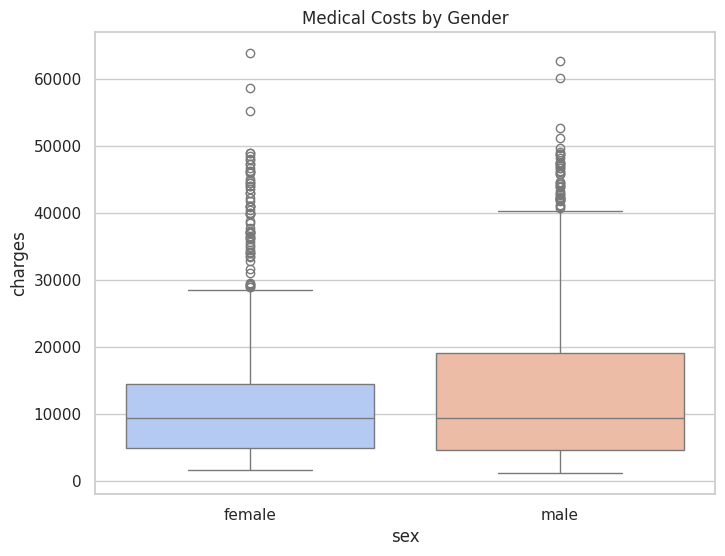

In [11]:
# Medical cost by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette="coolwarm")
plt.title('Medical Costs by Gender')
plt.show()

### 📌 Insight: Medical Costs by Gender

This boxplot compares medical charges between males and females.

**Key takeaways:**
- Median charges are similar for both genders.
- Males have slightly more high-cost outliers.
- Gender alone is not a strong predictor of medical costs.

This insight helps understand variable influence for the regression model.


🔹 Regression – Age vs Charges

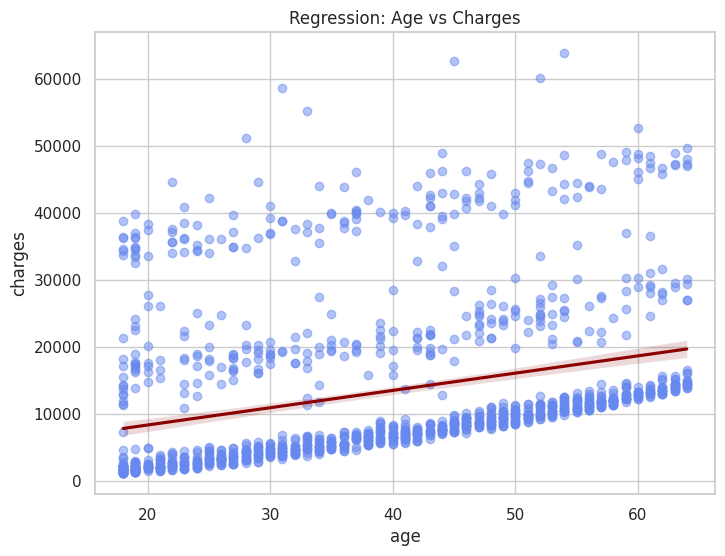

In [12]:
# Age vs Charges
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='charges', data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"darkred"})
plt.title('Regression: Age vs Charges')
plt.show()

### 📌 Insight: Age vs Charges

This scatter plot shows how medical charges vary with age.

**Key takeaways:**
- Charges tend to increase with age, showing a positive trend.
- Wide spread around the line indicates other factors also influence costs.
- Age is an important but not sole predictor for medical expenses.

This reinforces the need to include multiple variables in the regression model.


### 📌 Final Insights & Recommendations
### 📌 Key Takeaways

- **Smoking** is the biggest cost driver — smokers have much higher charges.  
- **Age & BMI** increase costs moderately.  
- **Gender & region** have minimal effect.  
- **Model performance:** R² ≈ 0.77, RMSE ≈ $6,000 — captures main trends but some variability remains.

This concludes the analysis and highlights the main factors affecting medical costs.

### 📌 Potential Improvements

- Explore **non-linear models** (e.g., Random Forest, XGBoost) to capture complex relationships.  
- Include additional **health indicators** (pre-existing conditions, medications) for better predictions.  
- Investigate **interactions** between variables (e.g., age × smoker, BMI × smoker).  
- Apply **feature scaling or transformations** for skewed variables like charges.  
- Add **cross-validation** for more robust model evaluation.

